# AirBnb listings file modeling

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [70]:
import os
import seaborn as sns
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE

from Utils.UtilsGeoViz import *
from Utils.UtilsViz import *
from Utils.DataUtils import *

RANDOM_SEED = 42

In [8]:
data_path = "C:\\Users\\sriharis\\OneDrive\\UChicago\\DataMining\\project\\NYData\\cleaned_with_nlp_listings.csv"
listings = pd.read_csv(data_path, index_col="id")

In [9]:
listings.head()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verifications_count,desc_len,host_about_len,lreview_year,lreview_month,lreview_day,freview_year,freview_month,freview_day,ndays_between_f_l_reviews,ndays_host,ndays_last_review,num_amenities,host_response_time_na,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2454,60,0,1.0,1.0,1,0,1,2,1.0,0.0,2.0,137.0,150.0,50.0,1,0.0,7,730,7,7,730,730,7.0,730.0,16,36,65,65,1,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,1,0,0,1.00,2,412,0,2019.0,1.0,30.0,2019.0,1.0,30.0,0.0,3803,2.0,15,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2539,100,0,8.0,8.0,1,1,0,4,1.0,1.0,1.0,149.0,100.0,25.0,1,25.0,1,730,1,1,730,730,1.0,730.0,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,8,0,5,3,0.23,4,392,431,2018.0,10.0,19.0,2015.0,12.0,4.0,15.0,3800,106.0,44,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.000000,0.222222,0.777778,0.000000,0.000000,0.000000
2595,60,0,5.0,5.0,1,1,0,2,1.0,0.0,1.0,225.0,350.0,100.0,2,0.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,43,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,0,1,1,2,1,0,1,0.38,5,1000,427,2019.0,1.0,2.0,2009.0,11.0,21.0,19.0,3798,31.0,36,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.000000,0.232558,0.302326,0.093023,0.046512,0.325581
3330,100,0,4.0,4.0,1,1,1,2,1.0,1.0,1.0,70.0,150.0,125.0,2,50.0,5,730,5,5,730,730,5.0,730.0,2,27,37,290,39,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,3,0,3,0,0.35,4,1000,25,2018.0,12.0,7.0,2010.0,1.0,4.0,3.0,3737,57.0,25,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.051282,0.102564,0.435897,0.051282,0.051282,0.307692
3831,96,0,1.0,1.0,1,1,1,3,1.0,1.0,3.0,89.0,500.0,50.0,1,0.0,1,730,1,1,730,730,1.0,730.0,8,11,14,162,231,58,90.0,9.0,9.0,10.0,10.0,10.0,10.0,0,0,0,1,1,0,0,4.37,5,1000,46,2019.0,1.0,17.0,2014.0,9.0,30.0,13.0,3709,16.0,31,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.004329,0.134199,0.571429,0.121212,0.086580,0.082251


In [10]:
listings.shape

(39926, 86)

In [11]:
listings.describe()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verifications_count,desc_len,host_about_len,lreview_year,lreview_month,lreview_day,freview_year,freview_month,freview_day,ndays_between_f_l_reviews,ndays_host,ndays_last_review,num_amenities,host_response_time_na,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
count,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,3.992600e+04,39926.000000,39926.000000,3.992600e+04,3.992600e+04,39926.000000,3.992600e+04,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.00000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000,39926.000000
mean,96.315884,0.210590,5.662826,5.662826,0.998422,0.528553,0.828608,2.950058,1.138306,1.184642,1.574463,142.387041,224.197390,61.030607,1.576992,15.795321,5.692331,5.544764e+04,5.527000,7.366002,5.544691e+04,5.544837e+04,6.357627,5.544767e+04,11.035390,23.616440,35.811251,125.589716,27.932124,11.737915,93.839754,9.615764,9.284652,9.745354,9.758679,9.539949,9.393478,0.374217,0.027225,0.029905,3.487627,2.216926,1.162551,0.108150,1.365680,5.367555,801.059335,183.031032,2017.998222,5.644818,14.928543,2016.462856,7.057431,15.210114,9.57852,1497.250739,242.526173,21.367530,0.415143,0.088864,0.120748,0.359265,0.417197,0.442869,0.112533,0.007263,0.027877,0.078620,0.032134,0.020713,0.010795,0.035641,0.443070,0.021139,0.001453,0.007113,0.006061,0.981691,0.259781,0.491660,0.062247,0.164064,0.430393,0.055104,0.079159,0.209033
std,12.673573,0.407732,45.784125,45.784125,0.039692,0.499190,0.376856,1.916729,0.422823,0.749081,1.124154,195.669190,379.084418,47.553397,1.184780,24.353929,16.410253,1.074829e+07,16.493872,63.251348,1.074829e+07,1.074829e+07,32.436964,1.074829e+07,12.138319,24.21

### Plot the dstribution

Let's plot the percentile for price

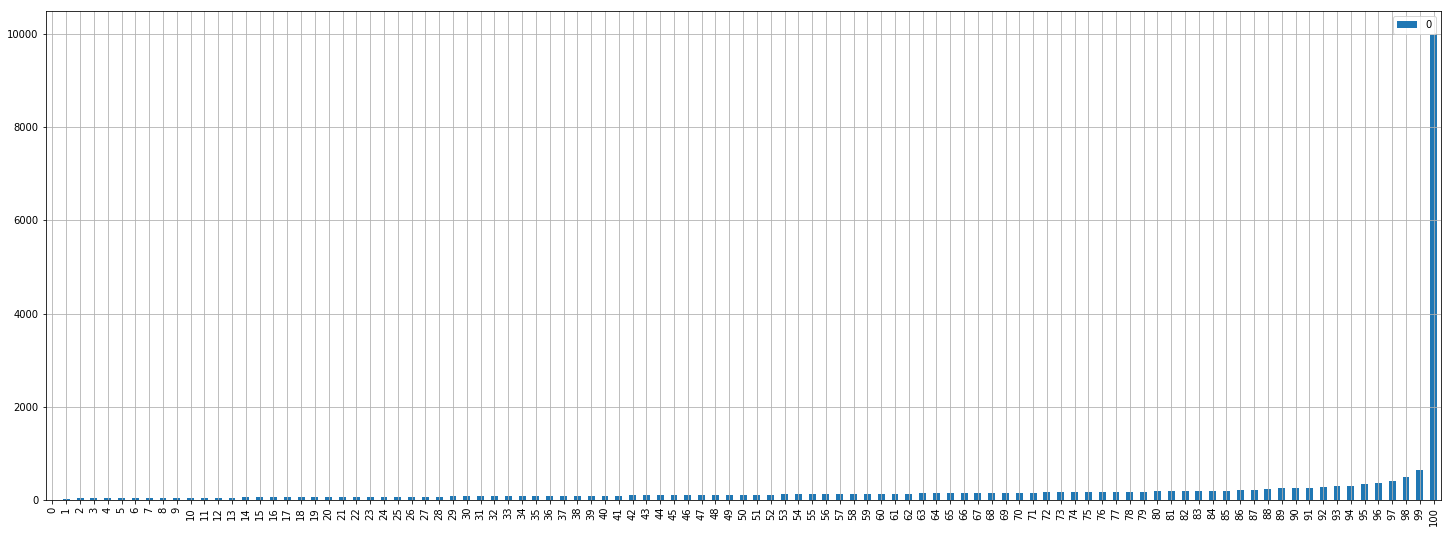

In [158]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
price_percentile.plot(kind='bar', figsize=(25,9), grid=True)

In [159]:
display(
    price_percentile.iloc[99,:].values[0],
    price_percentile.iloc[1,:].values[0]
)

650.0

30.0

Considering that beyond the 98th percentile (approx. 650 USD) the data shoots up, we can consider value above it as outliers.

Similarly, we can remove everything below 1% percentile.

How many rows would we lose if we removed everything above 99 percentile?

In [166]:
listings_filtered = listings[listings["price"] <= price_percentile.iloc[99,:].values[0]]
listings_filtered = listings_filtered[listings_filtered["price"] >= price_percentile.iloc[1,:].values[0]]
listings_filtered["price"].describe()

count    39282.000000
mean       132.384807
std         91.589050
min         30.000000
25%         70.000000
50%        100.000000
75%        170.000000
max        650.000000
Name: price, dtype: float64

In [167]:
100 * (listings.shape[0] - listings_filtered.shape[0]) / listings.shape[0]

1.6129840204378099

We lose less than 2% of rows upon dropping those outliers. Worth it.

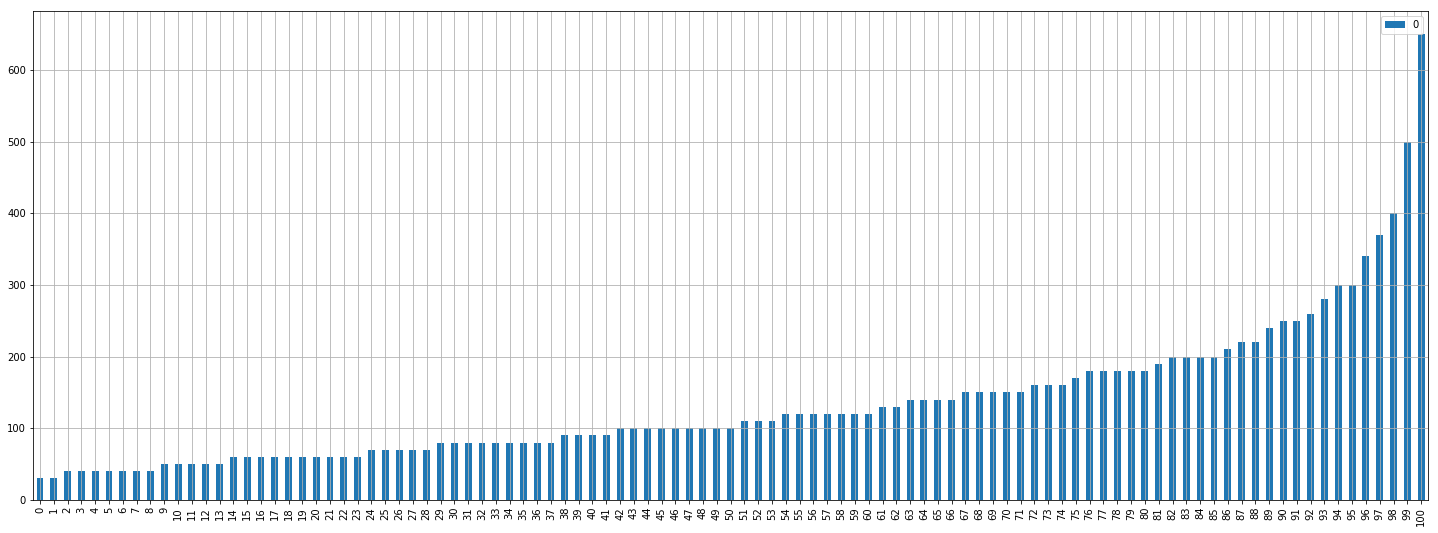

In [168]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings_filtered['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
price_percentile.plot(kind='bar', figsize=(25,9), grid=True)

## Rounding Prices 

For the sake of ease, what if we round the prices to the nearest multiple of 5?

In [169]:
base = 5
def roundto(row):
    return int(base * round(float(row)/base))
listings_filtered["price"] = listings_filtered["price"].apply(roundto)

## Preprocessing

In [170]:
ycol = ["price"]
xcol = [i for i in listings_filtered.columns if i not in ycol]
x = listings_filtered[xcol].values
y = listings_filtered[ycol].values

### 1. Standardisation

In [171]:
standard_scaler = StandardScaler()
x = standard_scaler.fit_transform(x)

### 2. Train test split

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=RANDOM_SEED)

### 3. Transformation

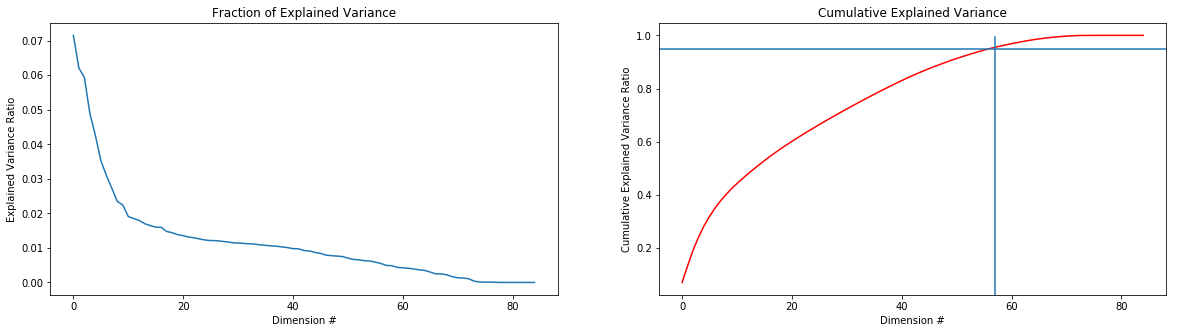

In [173]:
pca_naive = PCA(n_components=None)
pca_naive.fit(x_train)
f, ax = plt.subplots(1,2,figsize=(20,5))
plot_naive_variance(pca_naive, ax[0])
num_pc = plot_pca_var_cum(pca_naive, ax=ax[1], cutoff=0.95)

In [174]:
pca = PCA(n_components=num_pc)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

### Prediction

In [176]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X=x_train_pca, y=y_train)
y_pred_train = rfr.predict(X=x_train_pca)
y_pred_test = rfr.predict(X=x_test_pca)

In [177]:
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)

rmse_train = mse_train**(1/2)
rmse_test = mse_test**(1/2)

print("Train set RMSE: {:.2f}".format(rmse_train))
print("Test set RMSE: {:.2f}".format(rmse_test))

Train set RMSE: 21.97
Test set RMSE: 57.01


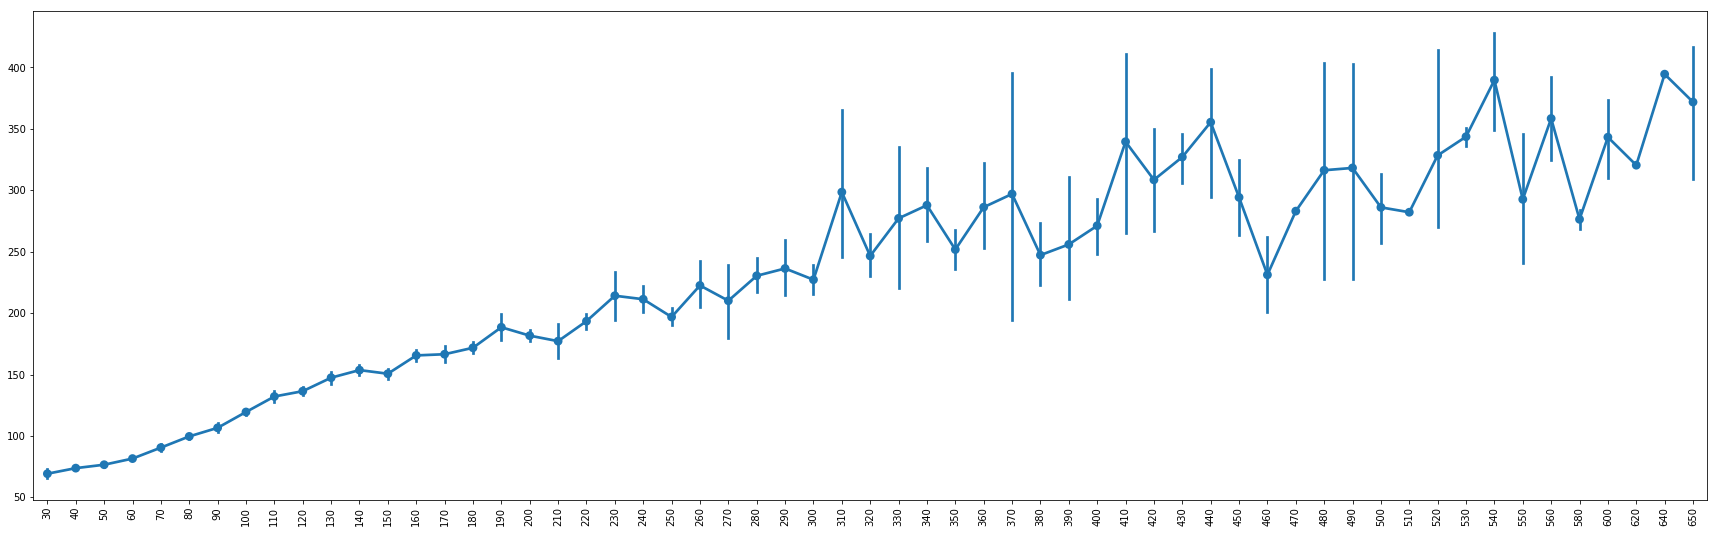

In [178]:
f, ax = plt.subplots(1,1, figsize=(30, 9))
g = sns.pointplot(x=y_test.ravel(), y=y_pred_test, ax=ax)
t = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [179]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X=x_train, y=y_train)
y_pred_train = rfr.predict(X=x_train)
y_pred_test = rfr.predict(X=x_test)

In [180]:
mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)

rmse_train = mse_train**(1/2)
rmse_test = mse_test**(1/2)

print("Train set RMSE: {:.2f}".format(rmse_train))
print("Test set RMSE: {:.2f}".format(rmse_test))

Train set RMSE: 20.42
Test set RMSE: 53.59


In [181]:
y_test.shape

(9821, 1)

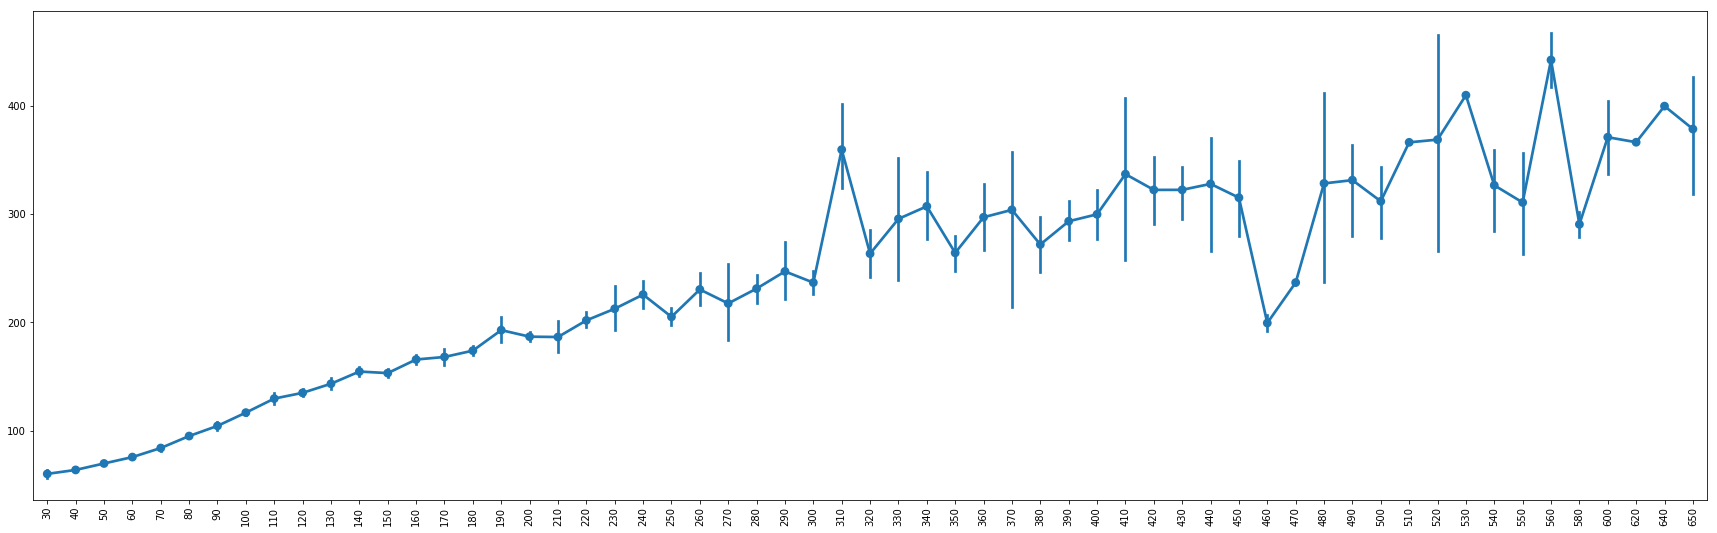

In [182]:
f, ax = plt.subplots(1,1, figsize=(30, 9))
g = sns.pointplot(x=y_test.ravel(), y=y_pred_test, ax=ax)
t = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Post Mortem analysis

What causes values beyond 250$ to not perform well for the random forest?

Let's get a count plot of all the bins we made

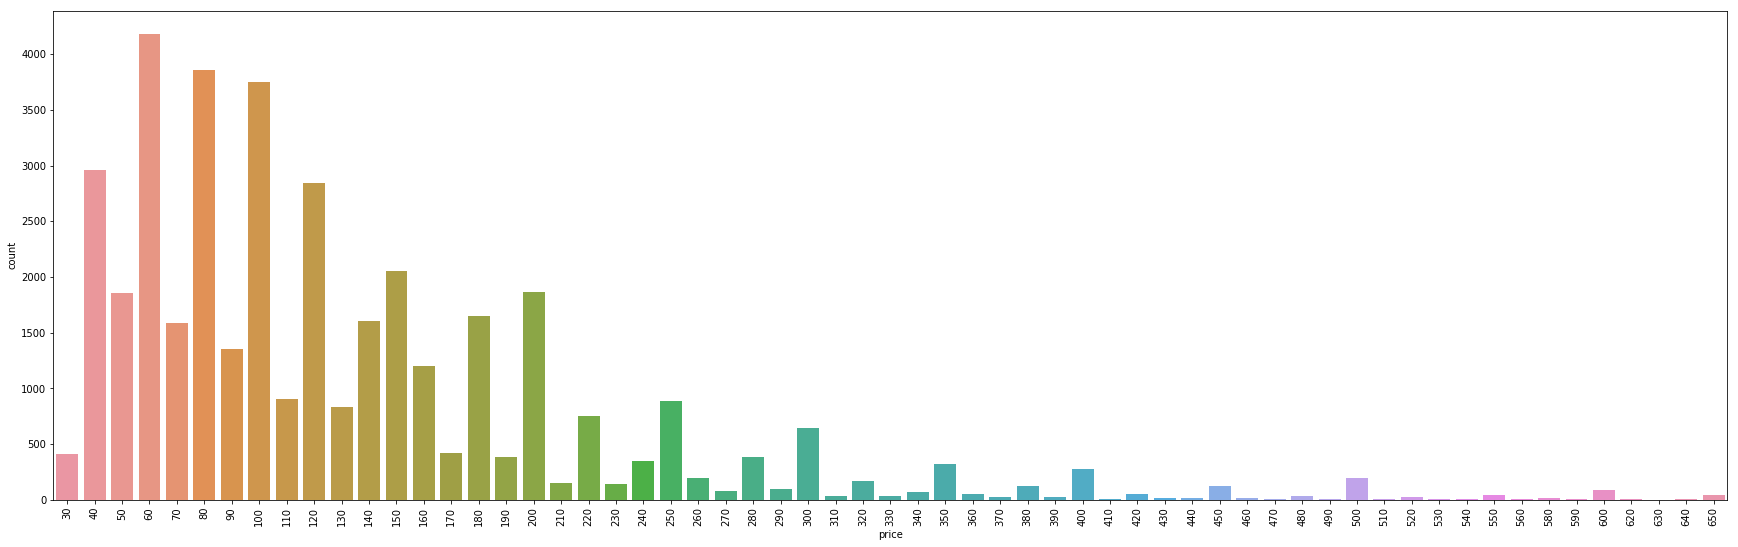

In [183]:
f, ax = plt.subplots(1, 1, figsize=(30,9))
g = sns.countplot(x=listings_filtered["price"], ax=ax)
t = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Can we compensate for the lack of data points to even out the price distributions everywhere?